# 1. 填充

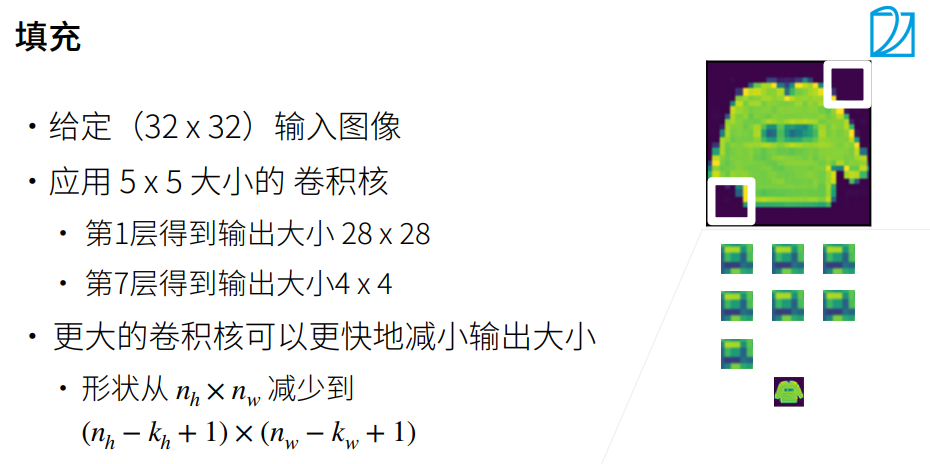

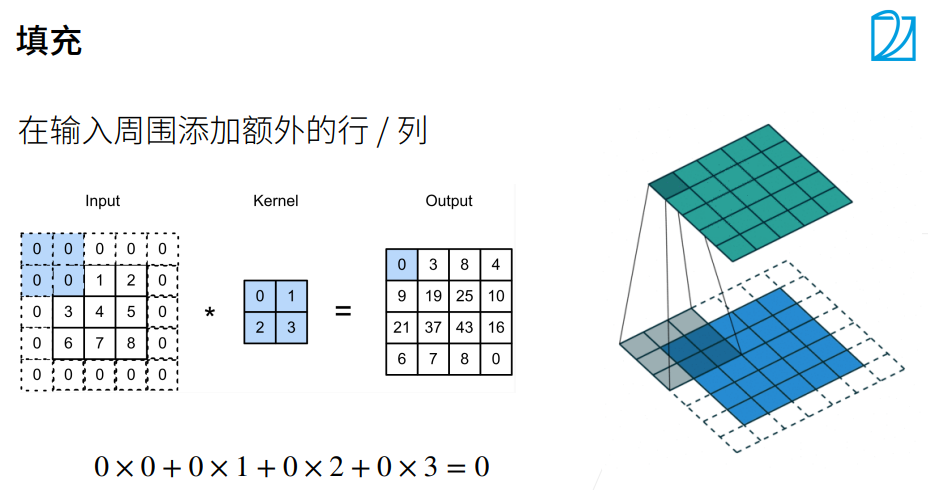

① 奇数卷积核更容易做padding。我们假设卷积核大小为k * k，为了让卷积后的图像大小与原图一样大，根据公式可得到padding=（k-1）/2，这里的k只有在取奇数的时候，padding才能是整数，否则padding不好进行图片填充。

② k为偶数时，p为浮点数，所做的操作为一个为向上取整，填充，一个为向下取整，填充。

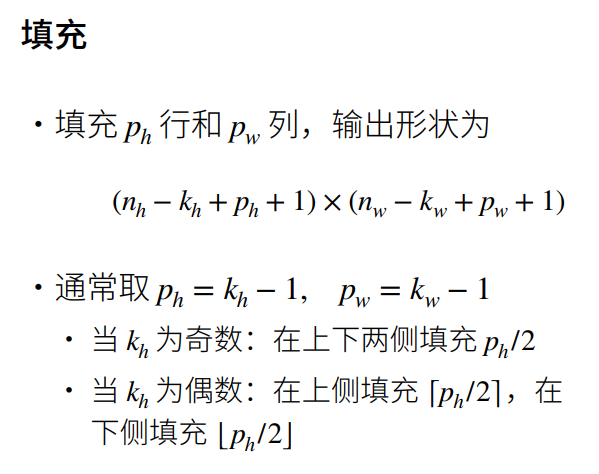

# 2. 步幅

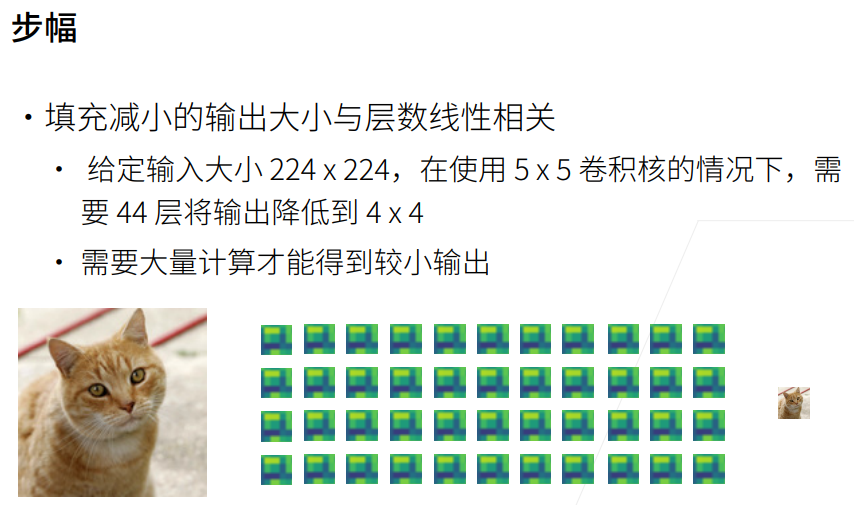

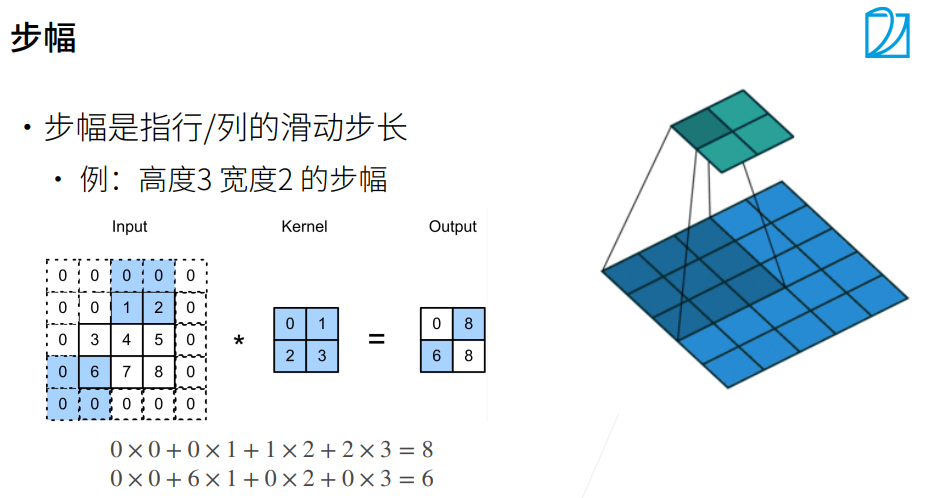

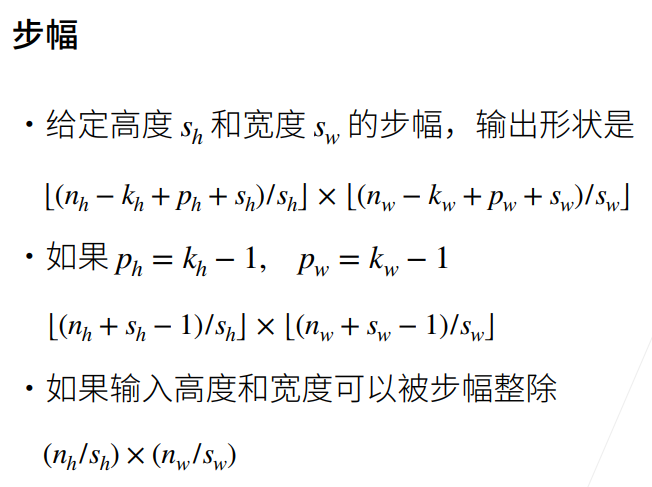

# 3. 总结

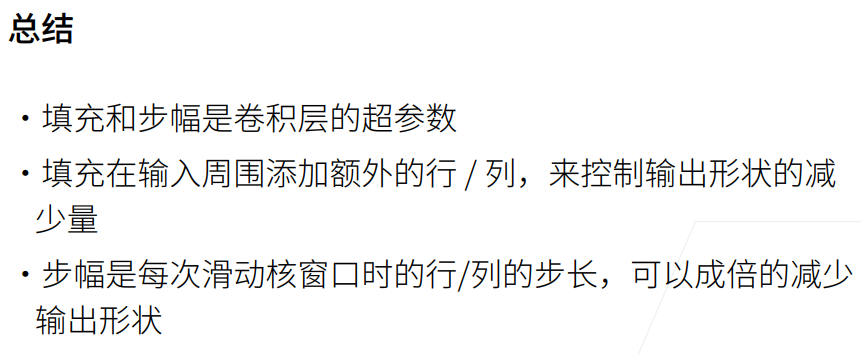

# 1. 填充和步幅（使用框架）

In [1]:
# 在所有侧边填充1个像素
import torch
from torch import nn

def comp_conv2d(conv2d, X): # conv2d 作为传参传进去，在内部使用
    X = X.reshape((1,1)+X.shape) # 在维度前面加入一个通道数和批量大小数
    Y = conv2d(X)  # 卷积处理是一个四维的矩阵
    return Y.reshape(Y.shape[2:]) # 将前面两个维度拿掉

conv2d = nn.Conv2d(1,1,kernel_size=3,padding=1) # padding=1 为左右都填充一行
X = torch.rand(size=(8,8))
print(comp_conv2d(conv2d,X).shape)
conv2d = nn.Conv2d(1,1,kernel_size=(5,3),padding=(2,1))
print(comp_conv2d(conv2d,X).shape)

# 将高度和宽度的步幅设置为2
conv2d = nn.Conv2d(1,1,kernel_size=3,padding=1,stride=2)
print(comp_conv2d(conv2d,X).shape)

# 一个稍微复杂的例子
conv2d = nn.Conv2d(1,1,kernel_size=(3,5),padding=(0,1),stride=(3,4))
print(comp_conv2d(conv2d,X).shape)

torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([4, 4])
torch.Size([2, 2])
